## UNet

2.10.1
2.10.0
Carrega v7-unet-v2-s256-e1000-v2-tf241-28h.h5
1/1 [==============================] - 6s 6s/step
../blood_samples/samples/blood_smear_3.JPG
U-net 256 new dataset


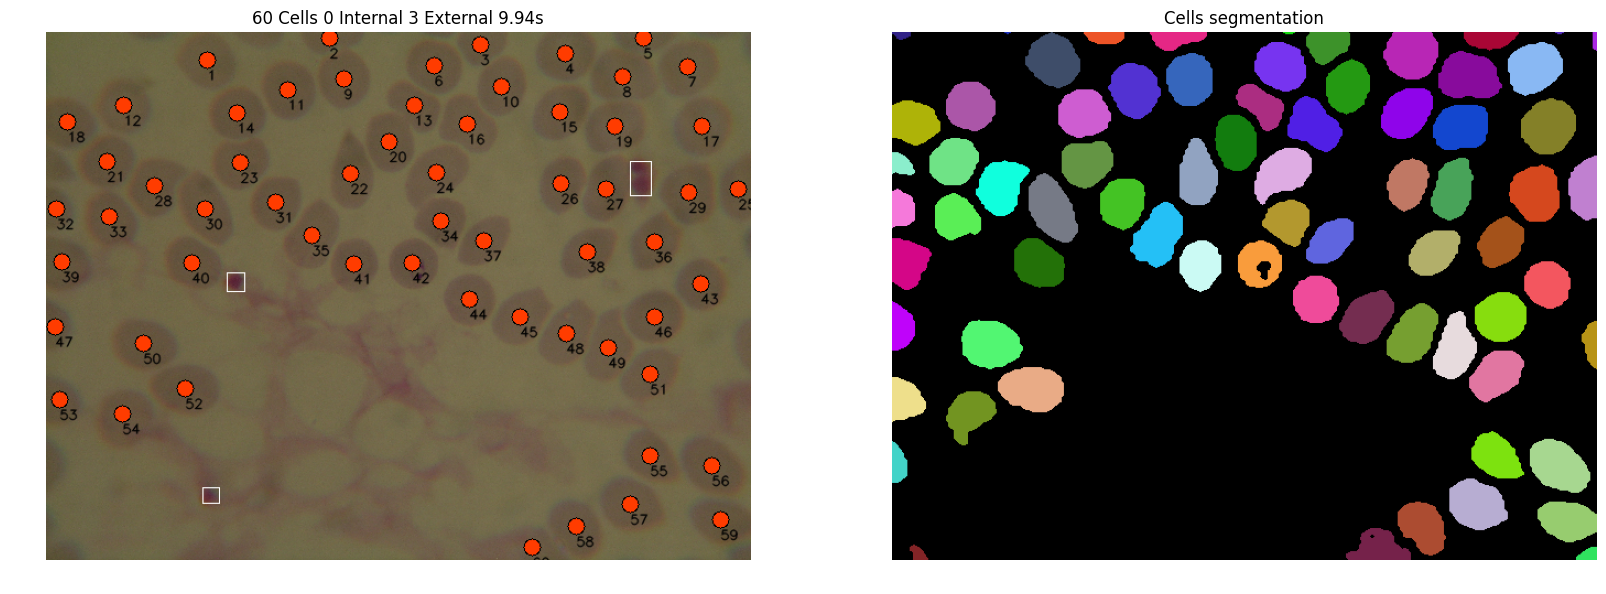

In [1]:
from ipynb.fs.full.general_functions import *
import ipynb.fs.full.methods_names as methods

def unet_method(path, validation_type, mark_parasites=True, trainVersion = 1):
    """
    Returns: (img, cell_mask_colored), (cells, internal, external, passTime)
    """
    start = time.time()
    #read in grayscale
    imgGS = get_image(path=path)
    #read in colors
    img = get_image(path=path,mode=1)

    
    if trainVersion == 7:
        #apply blur
        name = methods.UNETv7
        unet = UNetPredict(trainVersion=7)
        cell_mask = unet.predict(path)
        #garante que é preto e branco (sem isso ele estava unindo celulas que nao deveria)
        cell_mask = cv2.threshold(cell_mask, 127, 255, cv2.THRESH_BINARY)[1]
        cell_mask = erode(cell_mask,1)
    elif trainVersion == 6:
        #apply blur
        name = methods.UNETv6
        unet = UNetPredict(trainVersion=6)
        cell_mask = unet.predict(path)
        #garante que é preto e branco (sem isso ele estava unindo celulas que nao deveria)
        cell_mask = cv2.threshold(cell_mask, 127, 255, cv2.THRESH_BINARY)[1]
        cell_mask = erode(cell_mask,1)
    elif trainVersion == 5:
        #apply blur
        name = methods.UNETv5
        unet = UNetPredict(trainVersion=5)
        cell_mask = unet.predict(path)
    elif trainVersion == 4:
        #apply blur
        name = methods.UNETv4
        unet = UNetPredict(trainVersion=4)
        cell_mask = unet.predict(path)
    elif trainVersion == 3:
        #apply blur
        name = methods.UNETv3
        unet = UNetPredict(trainVersion=3)
        cell_mask = unet.predict(path)
    elif trainVersion == 2:
        #apply blur
        name = methods.UNETv2
        unet = UNetPredict(trainVersion=2)
        cell_mask = unet.predict(path)
        #garante que é preto e branco (sem isso ele estava unindo celulas que nao deveria)
        cell_mask = cv2.threshold(cell_mask, 127, 255, cv2.THRESH_BINARY)[1]
        cell_mask = erode(cell_mask,1)
    elif trainVersion == 1:
        #apply blur
        name = methods.UNETv1
        unet = UNetPredict(trainVersion=1)
        cell_mask = unet.predict(path)
        #garante que é preto e branco (sem isso ele estava unindo celulas que nao deveria)
        cell_mask = cv2.threshold(cell_mask, 127, 255, cv2.THRESH_BINARY)[1]
        cell_mask = erode(cell_mask,1)
    else:
        print("Versao invalida")
    
    method_ext = name
    
    
    #hsv mask
    par_mask, par_mask_dilated = hsv_par_mask(img)
    #GS mask
    #par_mask = gs_parasite_mask(imgGS)
    #plt.imshow(par_mask)
    #plt.show()
    
    #remove parasites from otsu
    cell_mask = remove_parasites(cell_mask,par_mask)
    
    #fill holes
    #cell_mask = fill_holes(cell_mask)
    
    #break gorup of cells
    #cell_mask = break_big_groups(cell_mask,_erode=0,_dilate=0)
        
    #colorize the cells
    cell_mask_colored = colorize(cell_mask)
    
    
    #mark
    img, cells = mark_cells(img, cell_mask,validation_type=validation_type)
    
    if mark_parasites:
        img, internal, external = parasites_mark(img, par_mask, cell_mask)
    else:
        internal, external = 0,0
        
    end = time.time()


    passTime = "%.2fs" % (end-start)
    
    print(path)
    print(name)

    #save results
    save_results(path,name,cells,internal,external, passTime, img, method_ext, validation_type)
    
    return (img, cell_mask_colored), (cells, internal, external, passTime)


if __name__ == '__main__':
    #PATH = "./PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    PATH = "../blood_samples/samples/blood_smear_3.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 7)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v2-cells-s416-e1500-v1-tf241-20h.h5
1/1 [==============================] - 1s 1s/step


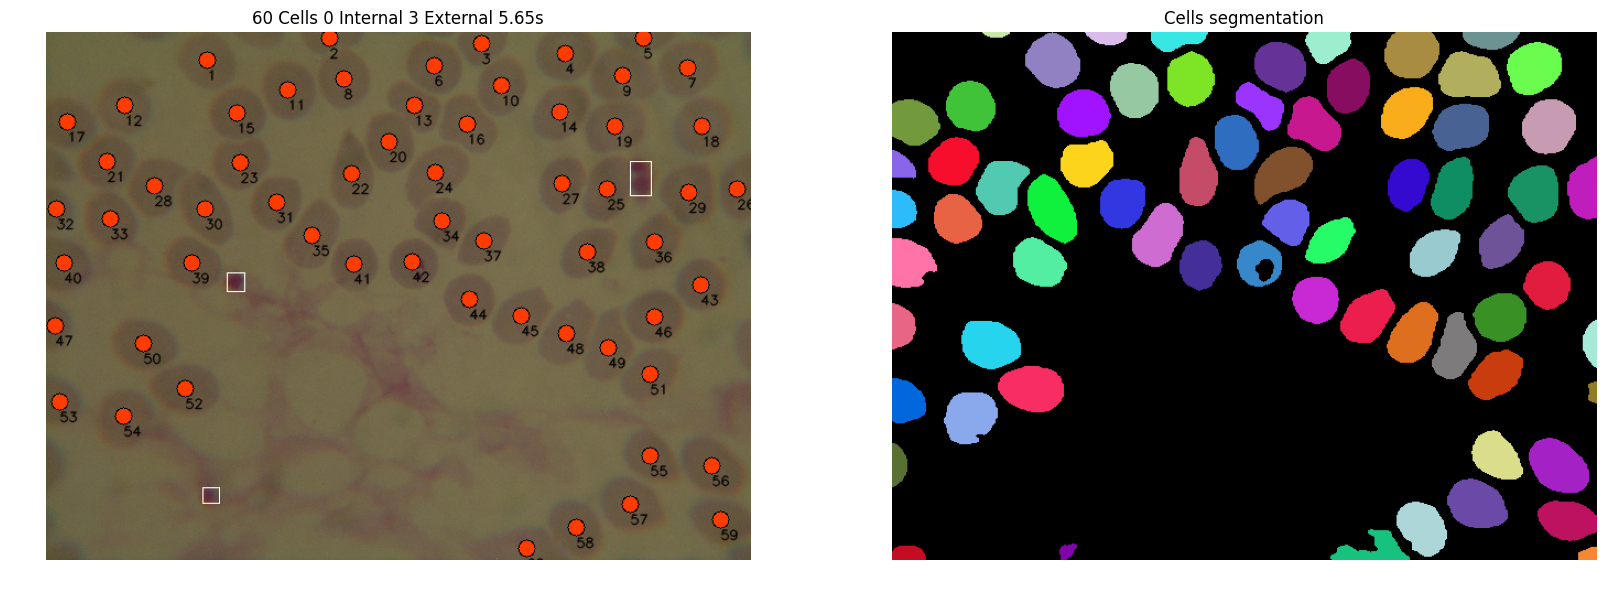

In [3]:
if __name__ == '__main__':
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 2)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v3-unet2-s256-e1500-v1-tf241-softmax-21.30h.h5
1/1 [==============================] - 3s 3s/step


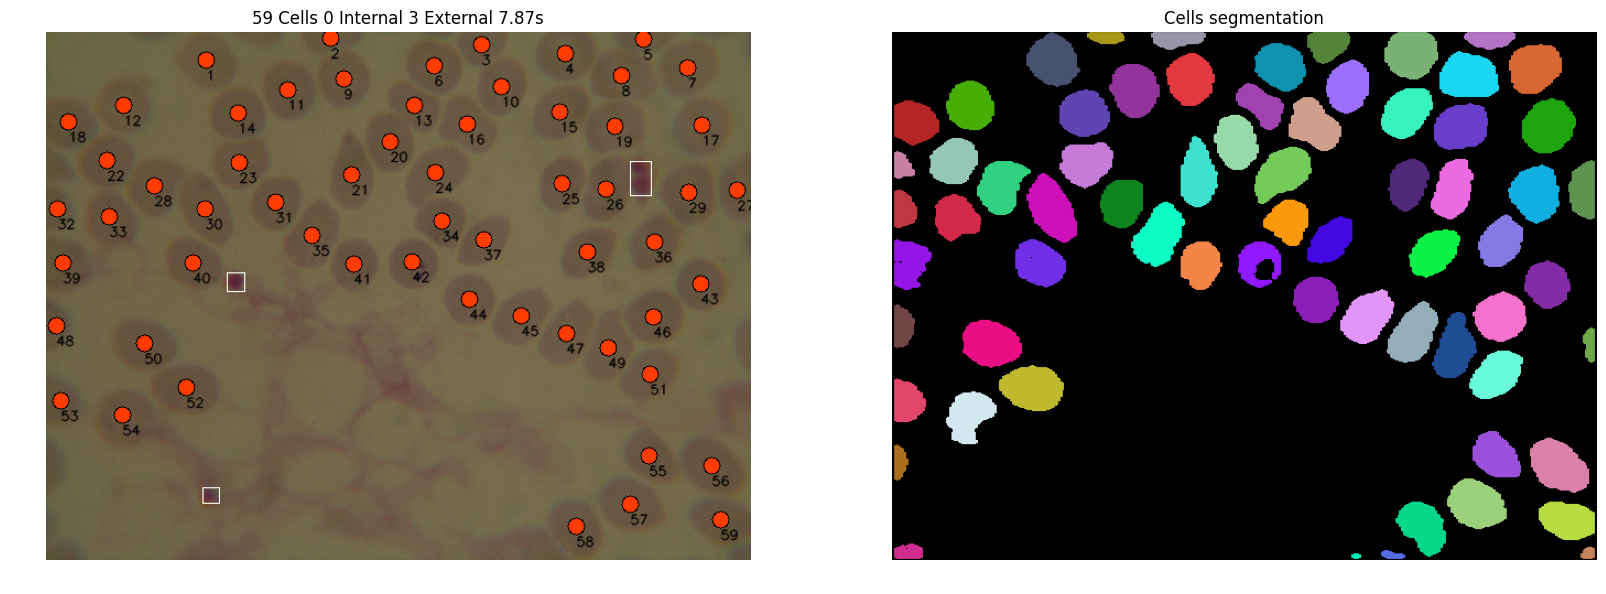

In [4]:
if __name__ == '__main__':
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 3)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v4-unet2-s416-e1500-v1-tf241-softmax-54h.h5
1/1 [==============================] - 3s 3s/step


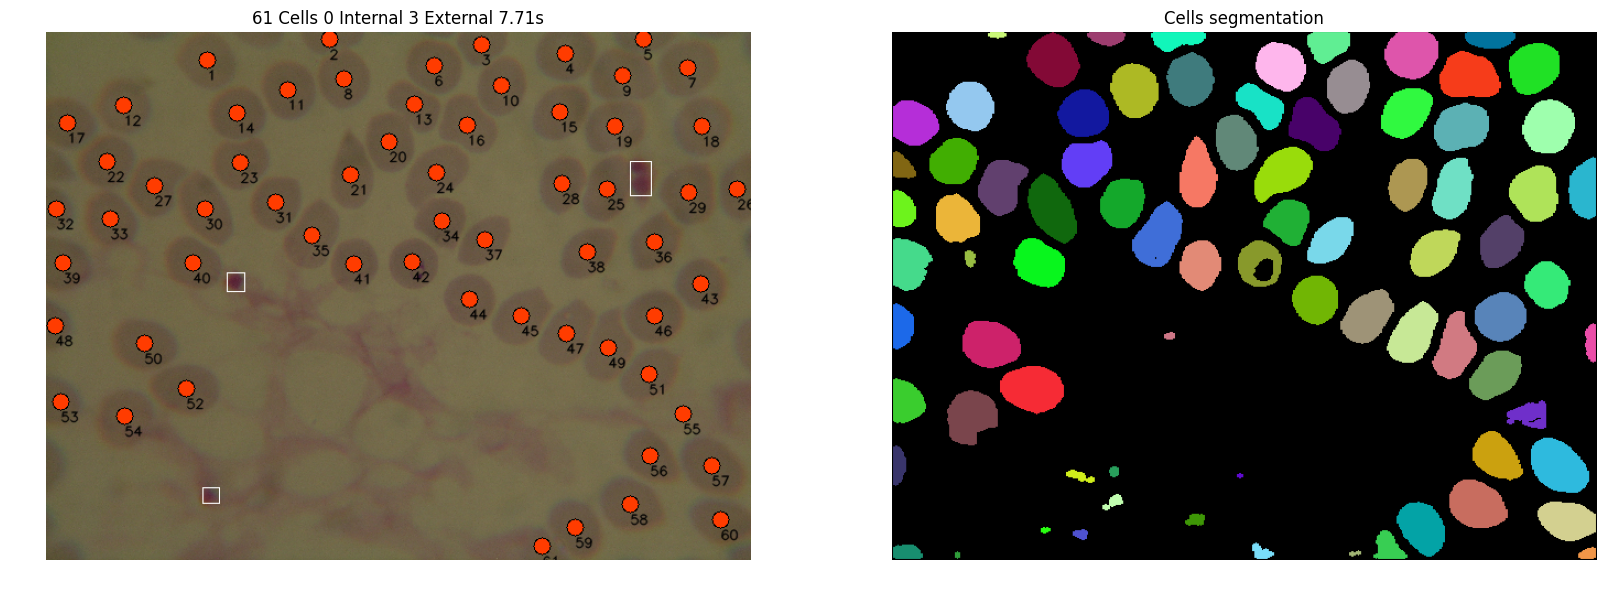

In [5]:
if __name__ == '__main__':
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 4)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v5-unet2-s384-e1500-v1-tf241-softmax-47h.h5
1/1 [==============================] - 3s 3s/step


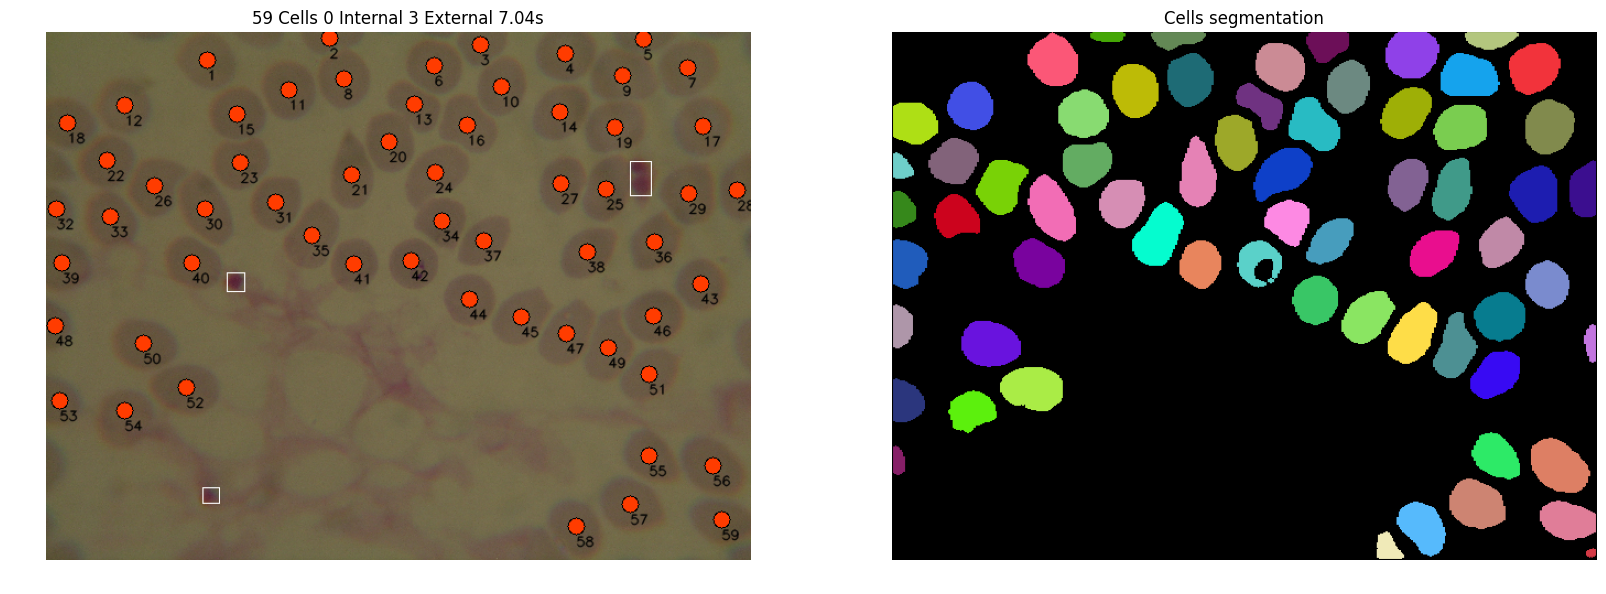

In [6]:
if __name__ == '__main__':
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 5)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

Carrega v6-cells-s384-e1500-v1-tf241-20h.h5
1/1 [==============================] - 1s 1s/step


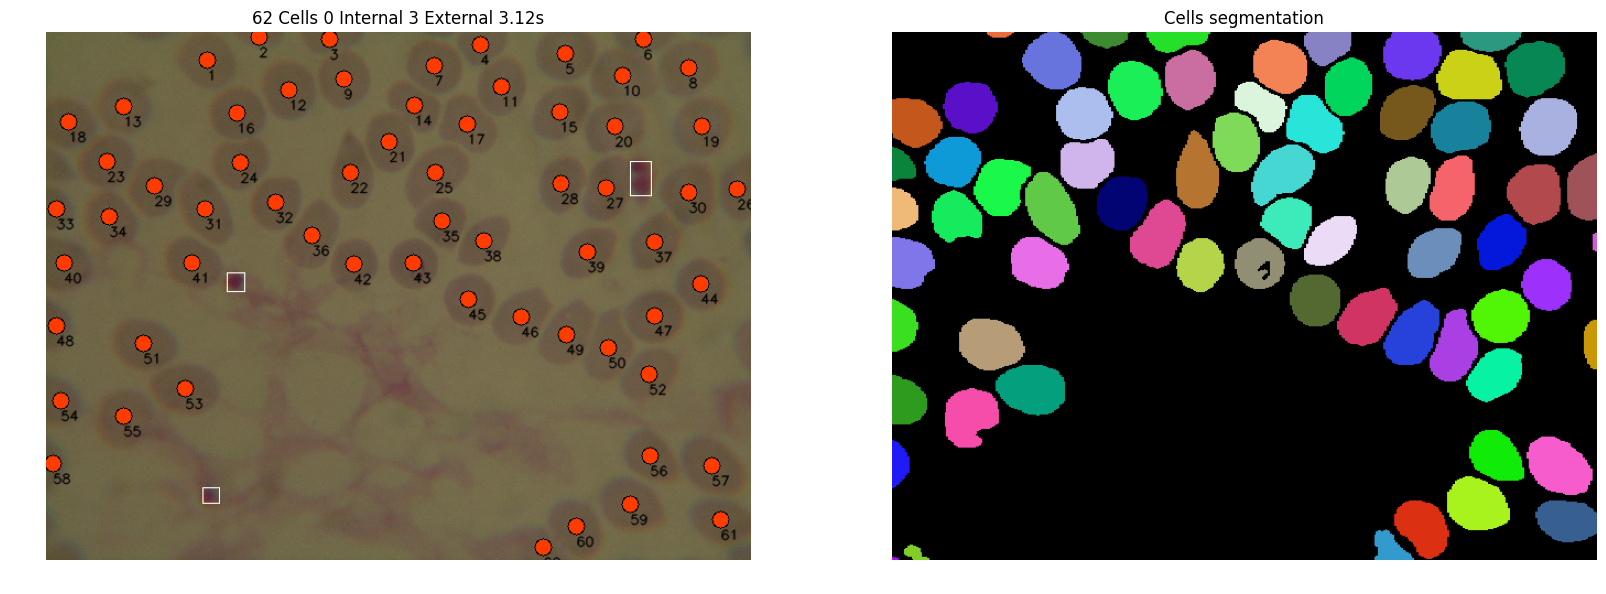

In [7]:
if __name__ == '__main__':
    images, stats = unet_method(PATH, NO_VALIDATION, trainVersion = 6)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()